In [34]:
# Warning 생략
import warnings
warnings.filterwarnings('ignore')
# Pandas
import pandas as pd
# Numpy
import numpy as np
# ML 저장
import joblib
# 그래프
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

### 주성분 분석(PCA: Principal Component Analysis)
- 고차원의 데이터를 저차원의 데이터로 환원시키는 기법

In [49]:
fruits = np.load("../Data/fruits.npy")
fruits.shape

(300, 100, 100)

In [36]:
# 2차원 배열
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape

(300, 10000)

In [37]:
fruits_2d

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

---
# PCA 모델 구성하기

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=50)      # 300개의 데이터(fruit_2d에서) 중 구별이 확실한 주성분 50개 선택
pca.fit(fruits_2d)      # 50개 학습

PCA(n_components=50)

In [40]:
pca.components_.shape

(50, 10000)

In [41]:
def draw_fruits(arr, ratio=1):  #ratio: 해상도 크기
    n = len(arr)    # n : 샘플 개수
    # 한줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))   # 올림
    # 행이 1개이며 열 개수는 샘플 개수이고 그렇지 않으면 10개 입니다.
    cols = n if rows < 2 else 10
    
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10+j < n:
                axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i,j].axis('off')
plt.show()

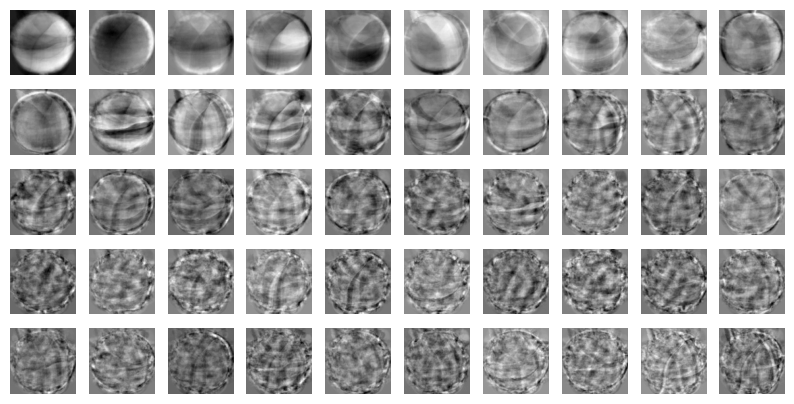

In [42]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [43]:
# 행의 개수는 원본과 동일하게 하고 Feature의 특성을 50개의 주성분으로 변경하기
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


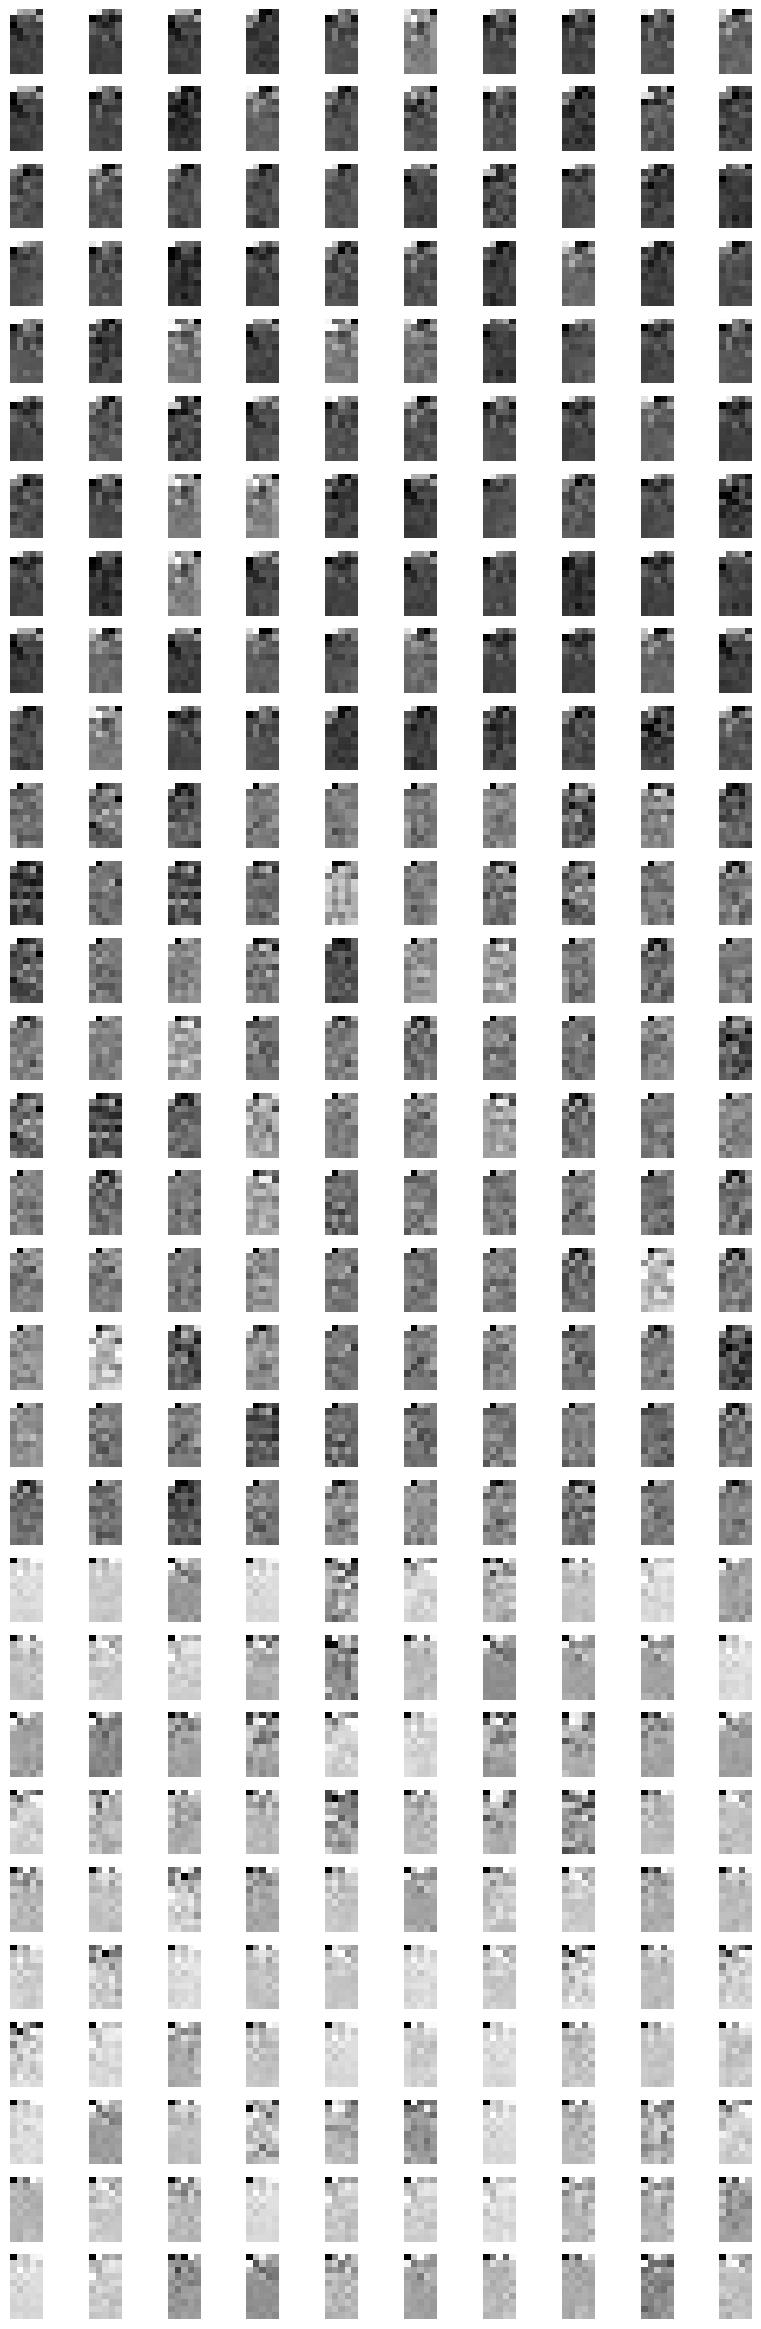

In [44]:
draw_fruits(fruits_pca.reshape(-1, 10, 5))      # 이미지의 각 포인트: 이 이미지로 어떤 이미지인지 판단한다.

---
## 원본 데이터 재구성

In [45]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

In [46]:
# 그림을 그리기 위해 2차원 확장
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
fruits_reconstruct.shape

(300, 100, 100)

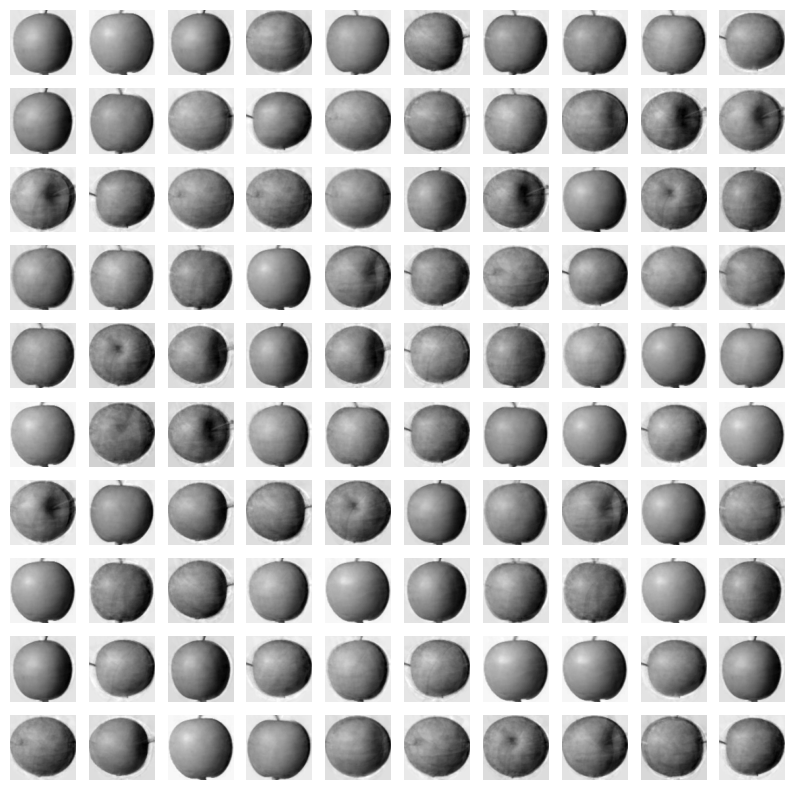

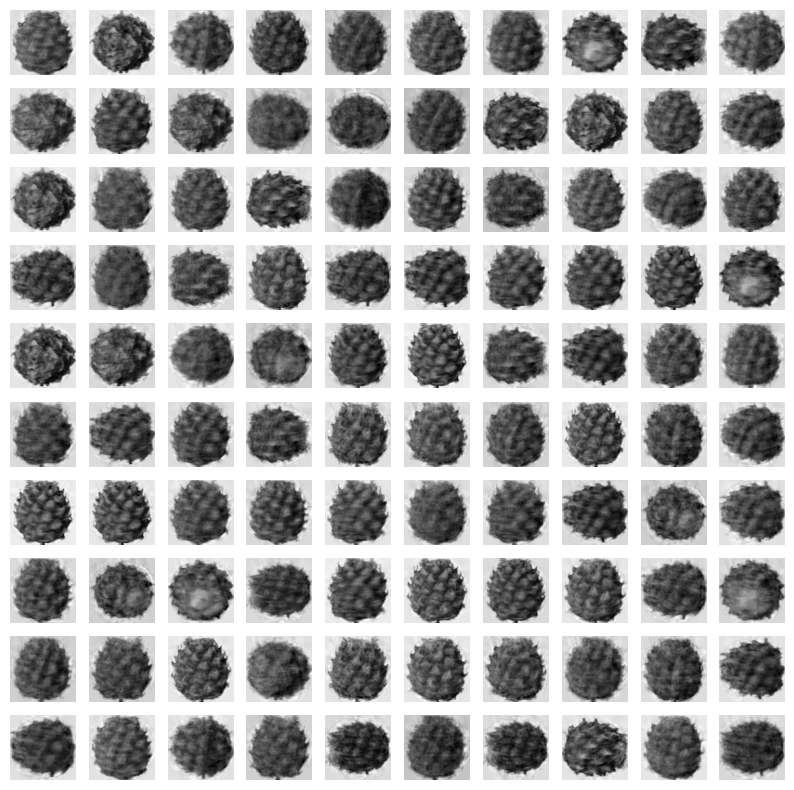

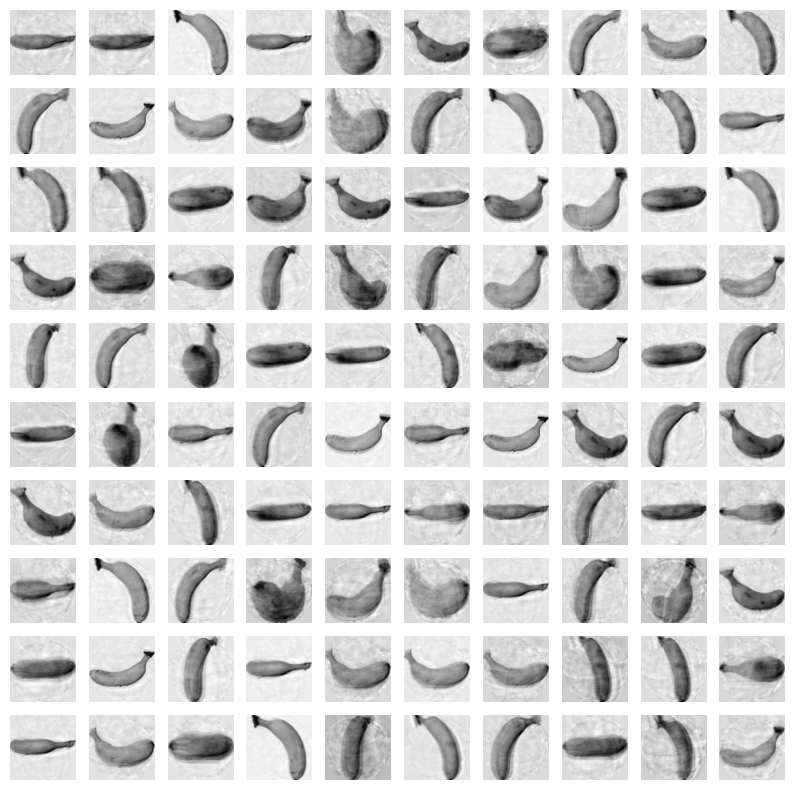

In [47]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("")

1/200의 데이터 특성만 가지고도 전반적으로 배경은 깨끗하지 않으나 물체의 구분은 가능하다.

In [48]:
# 복원 능력
np.sum(pca.explained_variance_ratio_)       # 92%의 복원 능력을 가진다. 

0.9222534133076141

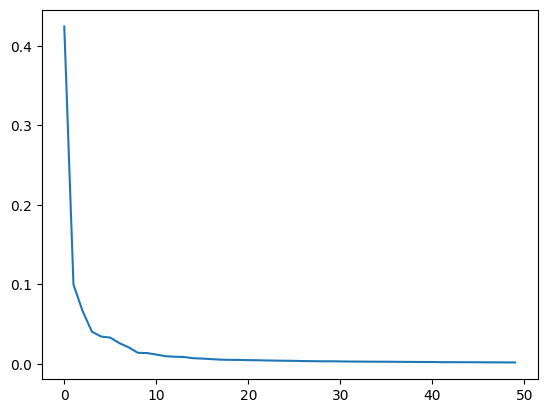

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

> 10개만 주성분으로 잡아도 문제 없을 것 같아 보인다.

In [ ]:
pca10 = PCA(n_components=10)
pca10.fit(fruits_2d)

PCA(n_components=10)

In [ ]:
pca10.components_.shape

(10, 10000)

In [ ]:
print(fruits_2d.shape)
fruits_pca10 = pca10.transform(fruits_2d)
print(fruits_pca10.shape)

(300, 10000)
(300, 10)


In [ ]:
# 원본 재구성
fruits_inverse_10 = pca10.inverse_transform(fruits_pca10)
fruits_inverse_10.shape

(300, 10000)

In [ ]:
# 그림을 그리기 위해 2차원 확장
fruits_reconstruct10 = fruits_inverse_10.reshape(-1, 100, 100)
fruits_reconstruct10.shape

(300, 100, 100)

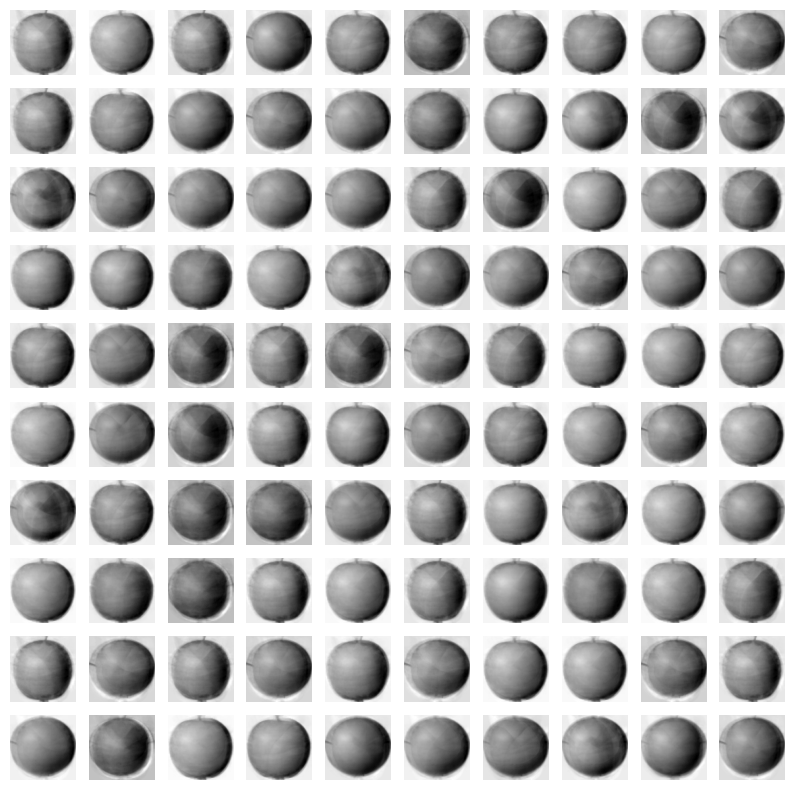

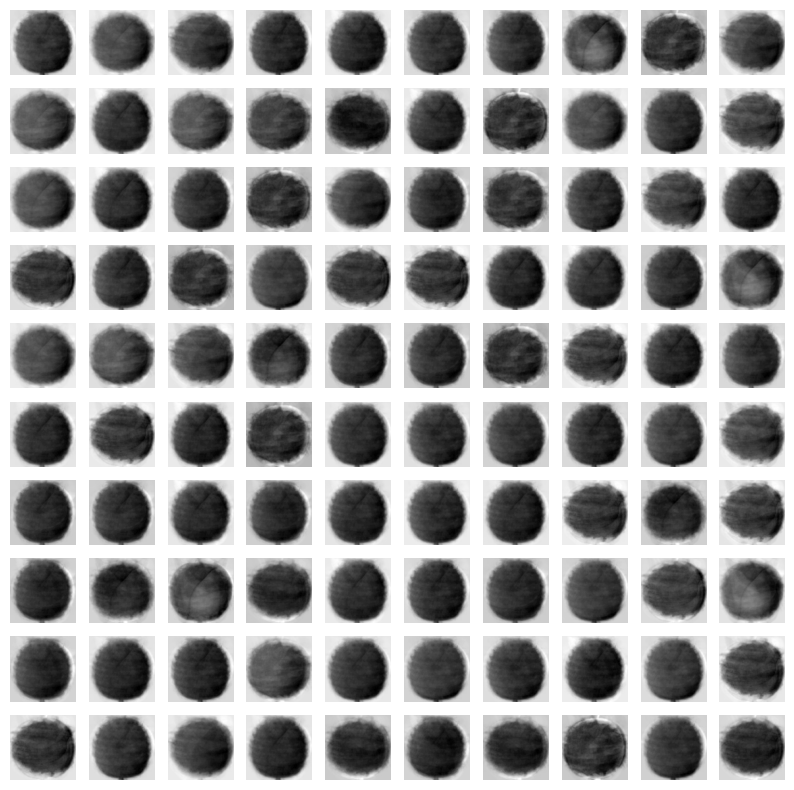

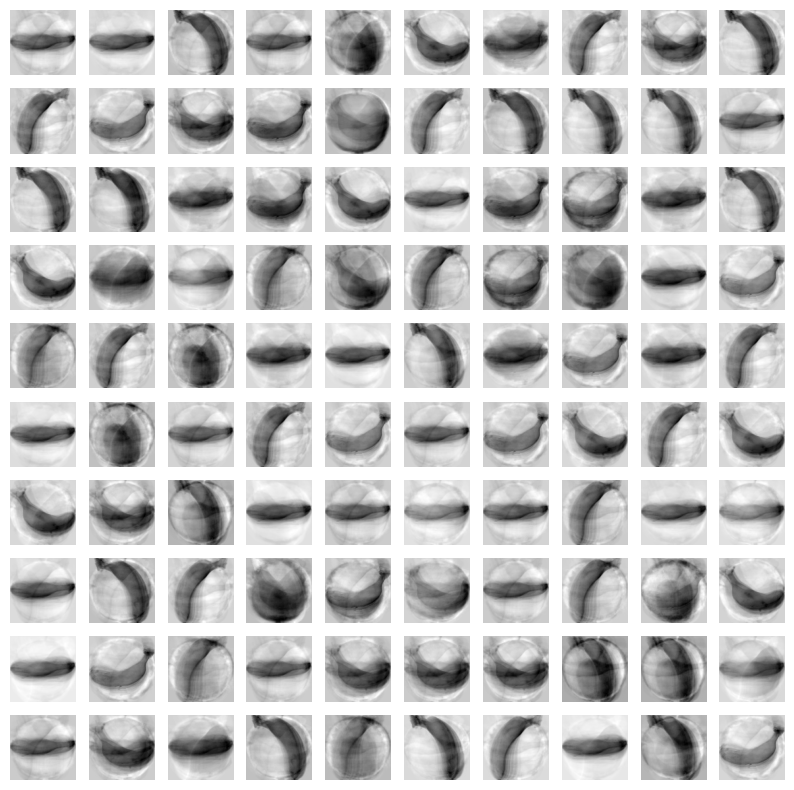

In [ ]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct10[start:start+100])
    print("")

In [ ]:
# 복원 능력
np.sum(pca10.explained_variance_ratio_)       # 77%의 복원 능력을 가진다. 

0.771109607948405

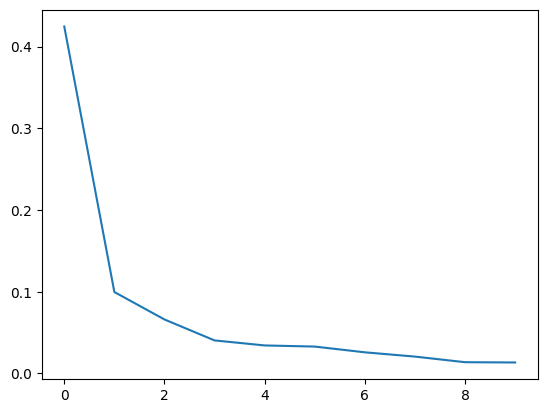

In [ ]:
plt.plot(pca10.explained_variance_ratio_)
plt.show()

---
#### 로지스틱 회귀분석에 주성분 분석을 대입하여 사용해 보기

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
# 로지스틱 회귀분석은 지도학습이므로 Target이 필요하다.
target = np.array([0]*100 + [1]*100 + [2]*100)

In [ ]:
# 교차검증을 통해 실시
from sklearn.model_selection import cross_validate

In [ ]:
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.5113840579986573


In [ ]:
# 
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.005737161636352539


In [ ]:
scores

{'fit_time': array([0.00769901, 0.00619864, 0.00454903, 0.00470114, 0.00553799]),
 'score_time': array([0.00028896, 0.00025439, 0.00015593, 0.00020313, 0.0001471 ]),
 'test_score': array([1., 1., 1., 1., 1.])}

In [ ]:
# 
scores = cross_validate(lr, fruits_pca10, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.004950809478759766


In [ ]:
scores

{'fit_time': array([0.00540924, 0.004915  , 0.00607991, 0.00429106, 0.00405884]),
 'score_time': array([0.00028515, 0.00022101, 0.000211  , 0.00017691, 0.00014997]),
 'test_score': array([1., 1., 1., 1., 1.])}